## Applying CNNs using keras API in Tensorflow.

### Here we will use Cconvolutional Neural Networks to solve the Fashion MNIST classification problem.

In [1]:
import tensorflow as tf
from tensorflow import keras

## Dataset


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

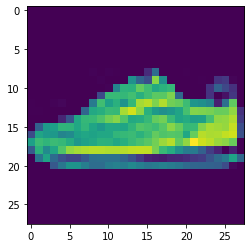

In [4]:
plt.imshow(x_train[52])

In [5]:
classes = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot" ]

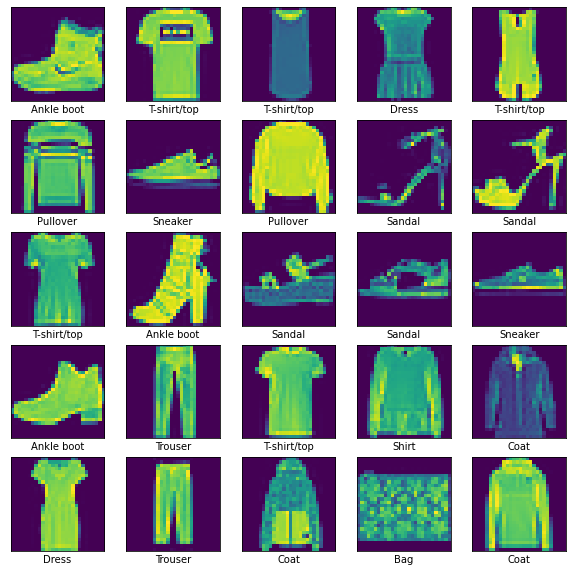

In [6]:
plt.figure(figsize=(10,10)) 
for i in range(25):
    plt.subplot(5,5,i+1) 
    plt.xticks([]) 
    plt.yticks([]) 
    plt.grid(False)
    

    # The image is reshape into 28x28 shape
    # because the original data is a single 1d array with 784 columns 
    # each indicating a pixel value
    
    plt.imshow(x_train[i].reshape(28, 28)) 
    plt.xlabel(classes[y_train[i]]) # assigning the labels
plt.show()

####  Preprocessing the dataset

In [7]:
x_train[1].shape

(28, 28)

In [22]:
from sklearn.preprocessing import StandardScaler

x_train = x_train[:] / 255.0
x_test = x_test[:] / 255.0

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

### Creating Cross-Validation set

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.15)

In [10]:
x_val.shape, x_train.shape

((9000, 28, 28, 1), (51000, 28, 28, 1))

## Creating a Model using Convolutional Neural Network - 

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, BatchNormalization
from keras.layers import MaxPool2D, Conv2D, Dropout
from functools import partial

In [12]:

model = Sequential([
                    Conv2D(filters=64, kernel_size=5, activation='relu', input_shape=[28, 28, 1]),
                    BatchNormalization(),
                    MaxPool2D(pool_size=(2, 2), padding='SAME'),
                    Dropout(0.35),
                    Conv2D(filters=64, kernel_size=5, padding='SAME', activation='relu'),
                    BatchNormalization(),
                    MaxPool2D(pool_size=(2, 2), padding='SAME'),
                    Dropout(0.35),
                    Flatten(),
                    Dense(units=256, activation='relu'),
                    Dropout(0.50),
                    Dense(units=10, activation='softmax')
                    
])

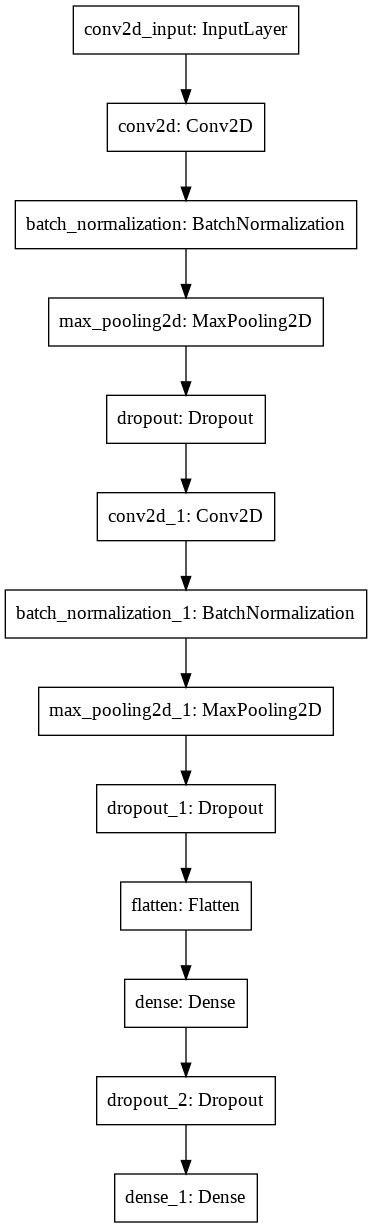

In [18]:
## Model Overview

from tensorflow.keras.utils import plot_model
plot_model(model)

## Compiling the model

In [13]:

model.compile(
    optimizer = keras.optimizers.Adam(0.003), 
    loss = 'sparse_categorical_crossentropy', 
    metrics=['accuracy']
    )

## Training the Model

In [14]:
Train = model.fit(x_train,
                  y_train, 
                  epochs=20,
                  batch_size=64, 
                  validation_data=(x_val, y_val),
                  validation_batch_size=1
)

Epoch 1/20
797/797 [==============================] - 206s 257ms/step - loss: 0.6656 - accuracy: 0.7734 - val_loss: 0.3805 - val_accuracy: 0.8569
Epoch 2/20
797/797 [==============================] - 203s 255ms/step - loss: 0.4452 - accuracy: 0.8372 - val_loss: 0.3865 - val_accuracy: 0.8676
Epoch 3/20
797/797 [==============================] - 203s 255ms/step - loss: 0.3864 - accuracy: 0.8605 - val_loss: 0.3120 - val_accuracy: 0.8859
Epoch 4/20
797/797 [==============================] - 203s 255ms/step - loss: 0.3482 - accuracy: 0.8734 - val_loss: 0.2910 - val_accuracy: 0.8887
Epoch 5/20
797/797 [==============================] - 200s 251ms/step - loss: 0.3245 - accuracy: 0.8816 - val_loss: 0.3100 - val_accuracy: 0.8864
Epoch 6/20
797/797 [==============================] - 200s 252ms/step - loss: 0.3085 - accuracy: 0.8873 - val_loss: 0.2694 - val_accuracy: 0.9034
Epoch 7/20
797/797 [==============================] - 201s 252ms/step - loss: 0.2918 - accuracy: 0.8930 - val_loss: 0.3241 -

### Due to computational limitations, I have trained model with just 20 epochs. You can increase number of epochs for greater accuracy.

## Evaluating the model

(0.0, 1.0)

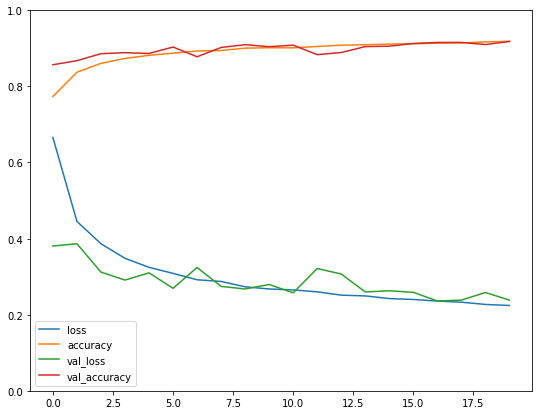

In [15]:
import pandas as pd
hist = pd.DataFrame(Train.history).plot(figsize=(9, 7))
hist.set_ylim(0, 1) 

## Predictions 

In [23]:
## Evaluating the model on training set

model.evaluate(x_test, y_test)

313/313 [==============================] - 9s 29ms/step - loss: 0.2424 - accuracy: 0.9163


[0.24241897463798523, 0.9162999987602234]

In [27]:
## Making Predictions

x = model.predict(x_test[:5]).round(2)
x

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [31]:
## Let's check the classes of first 5 instances in test set

classes = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot" ]

for i in x:
    for j in range(len(i)):
        if i[j] == 1: 
            print(classes[j], end=' , ')

Ankle boot , Pullover , Trouser , Trouser , Shirt , 

### We can see that all predictions are correct.

<br>
<br>
<br>





## This is the convolution neural network for image detection.